<a href="https://colab.research.google.com/github/ramandeepsinghjmu/ramandeepsingh/blob/main/GOODVSNICKVSSCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing json file

In [ ]:
#import json file

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/             ##importing kaggle.json file

In [ ]:
!kaggle datasets download -d warcoder/gkn-blade-surface-defect-dataset          ##importing kaggle.json file

Dataset URL: https://www.kaggle.com/datasets/warcoder/gkn-blade-surface-defect-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
... resuming from 2097152 bytes (47228053 bytes left) ...
 49% 23.0M/47.0M [00:00<00:00, 218MB/s]
100% 47.0M/47.0M [00:00<00:00, 251MB/s]


In [ ]:
import zipfile             ##helps to unzip the zipped data
zip_ref = zipfile.ZipFile('', 'r')
zip_ref.extractall('/content')
zip_ref.close()

BadZipFile: File is not a zip file

In [ ]:
## Feature scaling

Feature scaling

The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc.However, it becomes difficult to apply custom transformations that are not available in Keras.In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset

In [ ]:
import numpy as np                               ##import all python libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
import os

In [ ]:
import cv2 as cv

In [ ]:
import os

In [ ]:
count =0
for img in os.listdir('/content/GKN Blade Surface Defect Dataset/Data_GKN/Good'):
  count +=1
count

18

In [ ]:
count =0
for img in os.listdir('/content/GKN Blade Surface Defect Dataset/Data_GKN/Nick'):
  count +=1
count

FileNotFoundError: [Errno 2] No such file or directory: '/content/GKN Blade Surface Defect Dataset/Data_GKN/Nick'

In [ ]:
count =0
for img in os.listdir('/content/GKN Blade Surface Defect Dataset/Data_GKN/Scratch'):
  count +=1
count

149

In [ ]:
import cv2

In [ ]:
class dataLoad:

  def __init__(self,directory):
    self.directory = directory
    self.target_size= (160,160)
    self.X = []
    self.Y = []

  def extract_img(self,file):
    img = cv2.imread(file)
   # print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arr =cv2.resize(img,self.target_size)
    return img_arr

  def load_img(self,dir):
    IMG=[]
    for im_name in os.listdir(dir):
      path = dir + im_name
      single_img = self.extract_img(path)
      IMG.append(single_img)
    return IMG

  def load_lables(self):
    for sub_dir in os.listdir(self.directory):
      path= self.directory + '/' +sub_dir+'/'
      IMG = self.load_img(path)
      labels = [sub_dir for _ in range(len(IMG))]
      print(f"loaded successfully : {len(labels)}")
      self.X.extend(IMG)
      self.Y.extend(labels)

    return np.asarray(self.X),np.asarray(self.Y)

In [ ]:
img_load = dataLoad('/content/GKN Blade Surface Defect Dataset/Data_GKN')
X_train, Y_train = img_load.load_lables()

loaded successfully : 203
loaded successfully : 149
loaded successfully : 48


In [ ]:
img_load = dataLoad('/content/GKN Blade Surface Defect Dataset/Data_GKN')
X_train, Y_train = img_load.load_lables()

loaded successfully : 203
loaded successfully : 149
loaded successfully : 48


In [ ]:
import matplotlib.pyplot as plt

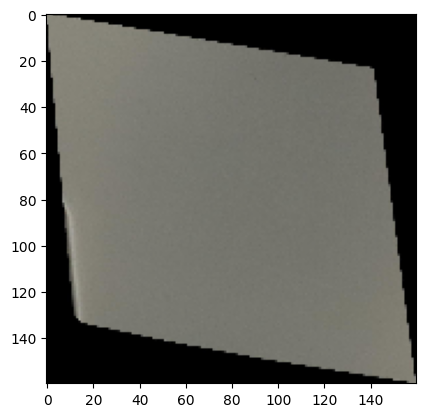

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc.
# However, it becomes difficult to apply custom transformations that are not available in Keras.
# In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2,
               zca_whitening = True)


train_data = train_gen.flow_from_directory('/content/GKN Blade Surface Defect Dataset/Data_GKN',   ##import path of train data
                                          class_mode='categorical',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')


test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('/content/GKN Blade Surface Defect Dataset/Data_GKN',      ##import path of test data
                                        class_mode='categorical',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')


Found 400 images belonging to 3 classes.
Found 400 images belonging to 3 classes.


# MODEL

In [ ]:
# In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to
#analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN),
#They have applications in image and video recognition, recommender systems, image classification, medical image analysis,
# natural language processing, brain-computer interfaces, and financial time serie

In [ ]:
model = tf.keras.models.Sequential()
#convolution+pooling
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
#second layer
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='tanh',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


#creating nueral network
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=3,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#TRAINING



Training the model to get an output with good accuracy

In [ ]:
model.fit(train_data,validation_data=test_data,epochs=20,batch_size = 5)

Epoch 1/20
50/50 [==============================] - 10s 208ms/step - loss: 0.9533 - accuracy: 0.5075 - val_loss: 0.9742 - val_accuracy: 0.5075
Epoch 2/20
50/50 [==============================] - 10s 209ms/step - loss: 0.9740 - accuracy: 0.5050 - val_loss: 0.9629 - val_accuracy: 0.5050
Epoch 3/20
50/50 [==============================] - 9s 188ms/step - loss: 0.9510 - accuracy: 0.5000 - val_loss: 0.9456 - val_accuracy: 0.5675
Epoch 4/20
50/50 [==============================] - 8s 170ms/step - loss: 0.9522 - accuracy: 0.5225 - val_loss: 0.9280 - val_accuracy: 0.5125
Epoch 5/20
50/50 [==============================] - 9s 190ms/step - loss: 0.9539 - accuracy: 0.5175 - val_loss: 0.9354 - val_accuracy: 0.5225
Epoch 6/20
50/50 [==============================] - 9s 188ms/step - loss: 0.9526 - accuracy: 0.5200 - val_loss: 0.9453 - val_accuracy: 0.5050
Epoch 7/20
50/50 [==============================] - 10s 198ms/step - loss: 0.9564 - accuracy: 0.5200 - val_loss: 0.9290 - val_accuracy: 0.5875
Epo

In [ ]:
 model.save('best_model.h5')

# PREDICTION



In [ ]:
# PREDICTION
# predicting a single image from test dataset
#Case 1 : Lets take Good Image

In [ ]:
result   #indexing of good,nick,scratch defect

array([[0.65790486, 0.18470512, 0.4915473 ]], dtype=float32)

In [ ]:
test_image = image.load_img('/content/GKN Blade Surface Defect Dataset/Data_GKN/Good/IMG_4684.JPG',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [ ]:
result

array([[0.65790486, 0.18470512, 0.4915473 ]], dtype=float32)

In [ ]:
from keras.preprocessing import image

# Load the image and preprocess it
test_image = image.load_img('/content/GKN Blade Surface Defect Dataset/Data_GKN/Good/IMG_4684.JPG', target_size=(64, 64), color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)

# Make predictions using the model
result = model.predict(test_image)



# Classify the image based on the thresholds
if result.argmax() == 0:
    print('Good')
elif result.argmax() == 1:
    print('Nick')
else:
    print('Scratch')

1/1 [==============================] - 0s 28ms/step
Good


In [ ]:
#visualization of the result :  lets see whether it gives good image or not

In [ ]:
import cv2
img = cv2.imread('/content/GKN Blade Surface Defect Dataset/Data_GKN/Good/IMG_4684.JPG',0)
img = img/255 #rescalinng
pred_img =img.copy()

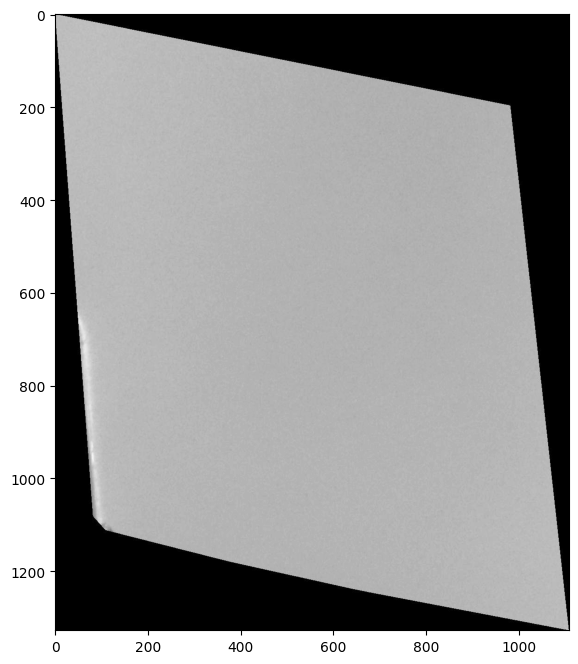

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
# Case 2 : lets take scratch image

In [ ]:
result

array([[0.5003943 , 0.35297135, 0.59707946]], dtype=float32)

In [ ]:
test_image = image.load_img('/content/GKN Blade Surface Defect Dataset/Data_GKN/Scratch/IMG_2107.JPG',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 20ms/step


In [ ]:
from keras.preprocessing import image

# Load the image and preprocess it
test_image = image.load_img('/content/GKN Blade Surface Defect Dataset/Data_GKN/Scratch/IMG_2107.JPG', target_size=(64, 64), color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)

# Make predictions using the model
result = model.predict(test_image)



# Classify the image based on the thresholds
if result.argmax() == 0:
    print('Good')
elif result.argmax() == 1:
    print('Nick')
else:
    print('Scratch')

1/1 [==============================] - 0s 20ms/step
Scratch


In [ ]:
#lets visualize that image is scratch or not

In [ ]:
import cv2
img = cv2.imread('/content/GKN Blade Surface Defect Dataset/Data_GKN/Scratch/IMG_2107.JPG',0)
img = img/255 #rescalinng
pred_img =img.copy()

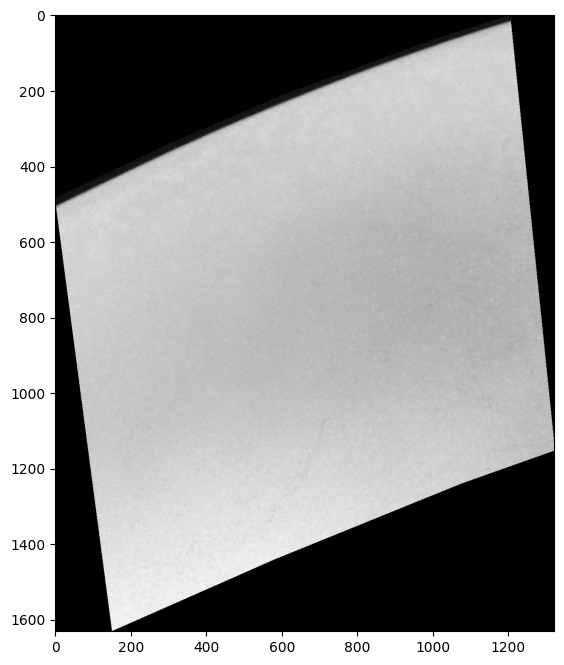

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
result_fin = max(result)
result_fin

array([0.5470556 , 0.20704412, 0.47005135], dtype=float32)